<a href="https://colab.research.google.com/github/mb1te/cm/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 4. ИНТЕРПОЛИРОВАНИЕ СПЛАЙНАМИ.**

**Приложение к лабораторной работе.** \\
Метод прогонки: \\
Решить контрольную систему, коэффициенты которой \\
$a_j = 1, b_j=-4, c_j = 1, f_j = -12, j = \overline{1, N - 1};\\
k_1 = -0.25, k_2 = -0.25, m_1 = 2.5, m_2 = 2.5.$ \\
Проверить, что точное решение этой системы: $y_j = 2$.

Система имеет вид: \\
$\cases {
 a_j \cdot y_{j - 1} - c_j \cdot y_j + b_j \cdot y_{j + 1} = -f_j \\
 y_0 = k_1 \cdot y_1 + m1 \\
 y_N = k_2 \cdot y_{N - 1} + m_2 
}$ \\
Решим систему методом прогонки для $N = \overline{2, 10}$.

In [37]:
a, b, c, f, k1, k2, m1, m2 = 1, 1, -4, -12, -0.25, -0.25, 2.5, 2.5
for N in range(2, 11):
  p = [0] * (N + 1)
  q = [0] * (N + 1)
  y = [0] * (N + 1)
  p[1] = k1
  q[1] = m1
  for j in range(1, N):
    p[j + 1] = b / (c - a * p[j])
    q[j + 1] = (f + a * q[j]) / (c - a * p[j])
  y[N] = (k2 * q[N] + m2) / (1 - k2 * p[N])
  for j in range(N - 1, -1, -1):
    y[j] = p[j + 1] * y[j + 1] + q[j + 1]
  print(f'N = {N}:', y)
 # print(f'p = {p}', f'q = {q}')


N = 2: [2.0, 2.0, 2.0]
N = 3: [2.0, 2.0, 2.0, 2.0]
N = 4: [2.0, 2.0, 2.0, 2.0, 2.0]
N = 5: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
N = 6: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
N = 7: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
N = 8: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9999999999999998]
N = 9: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9999999999999996, 2.0]
N = 10: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9999999999999996, 2.0, 2.0]


Как мы видим решения системы равны 2.

**Задание к лабораторной работе:**

1) Показать, что задавая значения производных в концевых точках, получаем кубический сплайн, который проходит через произвольно расположенные точки.

Система, задающая кубический сплайн используя значения  производных в концевых точках: \\
$
\cases {
  h_i \cdot s_{i - 1} + 2 (h_i + h_{i + 1}) \cdot s_i + h_{i + 1} \cdot
  s_{i + 1} = 6 \left( \frac{y_{i + 1} - y_i}{h_{i + 1}} - \frac{y_i - y_{i - 1}}{h_i}\right)\\
  s_0 = -\frac{s_1}{2} + \frac{3}{h_1^2} \cdot (y_1 - y_0) - \frac{3g_0}{h_1}\\
  s_n = - \frac{s_{n - 1}}{2} - \frac{3}{h_n^2} \cdot (y_n - y_{n - 1}) + 
  \frac{3g_n}{h_n}\\
  s_0'(x_0) = g_0 \\
  s_{n - 1}'(x_n) = g_n
}
$

Сгенерируем 20 точек в $[-1, 1]$ с ординатами в $[0, 1]$:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x_space = np.linspace(-1, 1, 21)
y = np.random.random(21)
x_space, y

(array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([0.07281826, 0.5951228 , 0.69292437, 0.8976379 , 0.67384697,
        0.28256642, 0.09250493, 0.56491879, 0.69737057, 0.01638621,
        0.62675886, 0.68669328, 0.90638294, 0.23336464, 0.54986324,
        0.52338945, 0.72076926, 0.83024107, 0.22133303, 0.42629749,
        0.23190286]))

Зададим разные значения производных у сплайнов

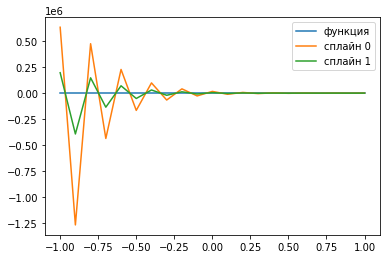

In [43]:
plt.plot(x_space, y, label='функция')
for _ in range(2):
  g_0 = 1 + _
  g_n = 1 - _
  N = 20
  p = [0] * (N + 1)
  q = [0] * (N + 1)
  s = [0] * (N + 1)
  h = 0.1
  k1, k2 = -0.5, -0.5
  m1 = 3 / h**2 * (y[1] - y[0]) - 3 * g_0 / h
  m2 = -3 / h**2 * (y[N] - y[N - 1]) + 3 * g_n / h
  a, b, c = h, -4 * h, h
  p[1] = k1
  q[1] = m1
  for j in range(1, N):
    f = -6 * ((y[j + 1] - y[j]) / h - (y[j] - y[j - 1]) / h)
    p[j + 1] = b / (c - a * p[j])
    q[j + 1] = (f + a * q[j]) / (c - a * p[j])
  s[N] = (k2 * q[N] + m2) / (1 - k2 * p[N])
  for j in range(N - 1, -1, -1):
    s[j] = p[j + 1] * s[j + 1] + q[j + 1]
  plt.plot(x_space, s, label=f'сплайн {_}')
plt.legend()
plt.show()



Слайны совпадают в заданных точках, но сильно отличаются в других точках

2) Задайте равномерное разбиение отрезка $[-1,1]$ и произвольные ординаты этих точек в диапазоне от $0$ до $1$. Постройте кубическую сплайн-интерполяцию такой функции. (Использовать квадратичные концы и естественный сплайн.)

In [40]:
x_space = np.linspace(-1, 1, 21)
y = np.random.random(21)
x_space, y

(array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([0.44441367, 0.87276439, 0.76163865, 0.23529925, 0.14442591,
        0.64085586, 0.81522523, 0.51580318, 0.25691418, 0.85220658,
        0.08441376, 0.2259506 , 0.07533546, 0.25055568, 0.13865214,
        0.50889756, 0.9128484 , 0.65495032, 0.44734702, 0.40095765,
        0.55594647]))

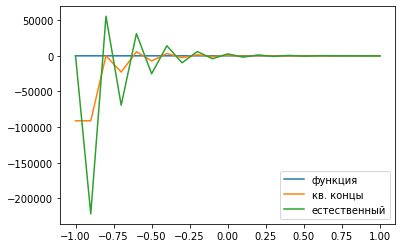

In [41]:
plt.plot(x_space, y, label='функция')
for it in range(2):
  N = 20
  p = [0] * (N + 1)
  q = [0] * (N + 1)
  s = [0] * (N + 1)
  h = 0.1
  if it == 0:
    k1, k2, m1, m2 = 1, 1, 0, 0
  else :
    k1, k2, m1, m2 = 0, 0, 0, 0
  a, b, c = h + 0.00000001, -4 * h, h
  p[1] = k1
  q[1] = m1
  for j in range(1, N):
    f = -6 * ((y[j + 1] - y[j]) / h - (y[j] - y[j - 1]) / h)
    p[j + 1] = b / (c - a * p[j])
    q[j + 1] = (f + a * q[j]) / (c - a * p[j])
  s[N] = (k2 * q[N] + m2) / (1 - k2 * p[N])
  for j in range(N - 1, -1, -1):
    s[j] = p[j + 1] * s[j + 1] + q[j + 1]
  if it == 0:
    plt.plot(x_space, s, label=f'кв. концы')
  else:
    plt.plot(x_space, s, label=f'естественный')
plt.legend()
plt.show()

Слайны совпадают в заданных точках, но сильно отличаются в других точках